In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
path = "/home/zeng/Desktop/riskModel/SIV-NCBI-info.txt"
meta_info_NCBI = pd.read_csv(path, sep='\t')
meta_info_NCBI = meta_info_NCBI.replace('Unknown', np.nan)

In [3]:
meta_info_NCBI.head()

,accession,length,host,segment,serotype,country,region,date,name,mutations,age,gender,lineage,vac_strain,fulllength_plus
0,AY060030,995,Swine,4 (HA),H1N2,USA,N,2000,Influenza A virus (A/SW/AR/12491/00(H1N2)),NaN,NaN,NaN,NaN,NaN,p
1,AY060046,1771,Swine,4 (HA),H1N2,USA,N,2001,Influenza A virus (A/SW/CO/17871/01(H1N2)),NaN,NaN,NaN,NaN,NaN,c
2,AY060039,995,Swine,4 (HA),H1N2,USA,N,2001,Influenza A virus (A/SW/IN/14810-S/01(H1N2)),NaN,NaN,NaN,NaN,NaN,p
3,AY060038,995,Swine,4 (HA),H1N2,USA,N,2001,Influenza A virus (A/SW/IN/14810-T/01(H1N2)),NaN,NaN,NaN,NaN,NaN,p
4,AY060034,995,Swine,4 (HA),H1N2,USA,N,2000,Influenza A virus (A/SW/KS/13481-S/00(H1N2)),NaN,NaN,NaN,NaN,NaN,p


In [4]:
serotype_map = {'H1N1': 'H1', 'H1N2': 'H1', 'H1': 'H1', 'mixed,H1': 'H1', 'mixed': 'H1', 'mixed,N1': 'H1', 'H1,mixed': 'H1', 'H1N7': 'H1', 
                'H2N3': 'H2', 'H2': 'H2',
                'H3N2': 'H3', 'H3N1': 'H3', 'H3': 'H3', 'mixed,H3': 'H3', 'H3Nx': 'H3', 'H3,mixed': 'H3', 'H3N3': 'H3', 'mixed.H3': 'H3', 'H3N6': 'H3', 'H3N8': 'H3',
                'H4N8': 'H4', 'H4N1': 'H4', 'H4N6': 'H4', 
                'H5N1': 'H5', 'H5N2': 'H5', 'H5N6': 'H5', 
                'H6N6': 'H6', 
                'H7N9': 'H7',  'H7N2': 'H7', 
                'H9N2': 'H9',
                'H10N5': 'H10',
                'H11N6': 'H11'}

In [5]:
meta_info_NCBI['serotype_'] = meta_info_NCBI.serotype.map(serotype_map)

In [6]:
meta_info_NCBI.fulllength_plus.value_counts()

c     14230
p      2936
nc      343
Name: fulllength_plus, dtype: int64

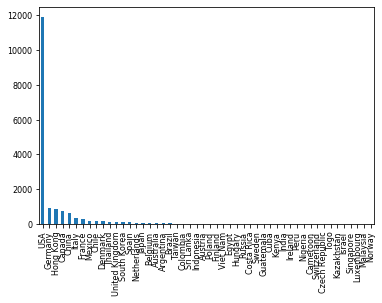

In [7]:
meta_info_NCBI.country.value_counts().plot(kind='bar', fontsize=8)

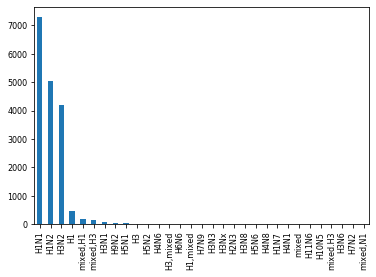

In [8]:
meta_info_NCBI.serotype.value_counts().plot(kind='bar', fontsize=8)

In [9]:
time_index = pd.to_datetime(meta_info_NCBI.date.values)

In [10]:
df2 = pd.Series(meta_info_NCBI.serotype.values, index=time_index)

In [11]:
df3 =meta_info_NCBI[['country', 'serotype_']]
df3 = df3.set_index(time_index.to_period('Y'))

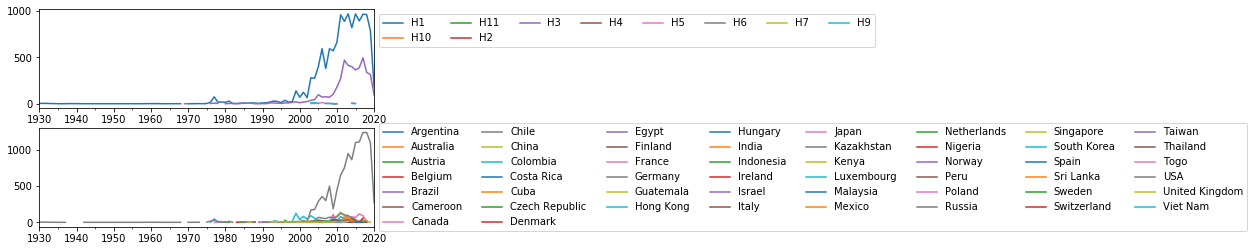

In [12]:
fig, axes = plt.subplots(2, 1)
df3['serotype_'].groupby([df3.index, df3.serotype_]).count().unstack().plot(ax=axes[0])
axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=8)
df3['country'].groupby([df3.index, df3.country]).count().unstack().plot(ax=axes[1])
axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1.1), ncol=8)

In [13]:
meta_info_NCBI.serotype_.value_counts()

H1     12990
H3      4427
H9        55
H5        50
H4         5
H7         3
H2         2
H6         2
H11        1
H10        1
Name: serotype_, dtype: int64

In [22]:
meta_info_NCBI[meta_info_NCBI.serotype_ == 'H1'][['accession', 'length', 'serotype', 'country', 'region', 'date', 'name']].set_index('accession').to_json("/home/zeng/Desktop/riskModel/SIV-NCBI-info-new.txt", orient='index')